*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">


<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/notebooks/module03_02_derivatives_partial_derivatives.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
%matplotlib inline
%autosave 0
import matplotlib.pyplot as plt
import numpy as np

Autosave disabled


# Derivatives and partial derivatives

To solve linear regression we need to review the concept of derivatives, and how they can be used to find minima/maxima of a function of a single variable.  We will then extend these ideas to multivariate functions like the ones we deal with in machine learning.

### Derivatives

As you recall, the derivative of a function of a single variable indicates the steepness of the curve at a given point.
The following figure demonstrates that.

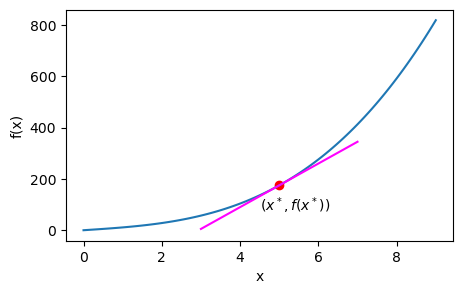

In [3]:
plt.style.use('default')
plt.figure(figsize=(5,3))

def f(x):
    return x**3 + 10*x

def f_deriv(x):
    return (3 * x**2) + 10

x = np.linspace(0,9, 100)
y = f(x)

x1 = 5
y1 = f(x1)
deriv = f_deriv(x1)

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(x, y)

plt.scatter(x1,y1, c='red')
plt.annotate(r'$(x^*,f(x^*))$',(x1,y1), xytext=(x1-0.5, y1-100))

# plot the tangent line at the point (x1,y1)
xMin = x1 - 2
yMin = y1 - (2*deriv)
xMax = x1 + 2
yMax = y1 + (2*deriv)
plt.plot([xMin,xMax],[yMin,yMax], color='magenta');


The line tangent to $f(x)$ at the point $x^*$ has a slope that is equal to the derivative of $f$ at that point.

#### Derivaties of common function

The following is a review of the derivative rules you will need to take the derivatives of the functions we will encounter in this course.

The *power rule*

\begin{equation}
\frac{d}{dx} x^{n} = nx^{n-1}
\end{equation}

The *product rule*

\begin{equation}
\frac{d}{dx}[f(x)g(x)] = f'(x)g(x) + f(x)g'(x) 
\end{equation}

The *quotient rule*

\begin{equation}
\frac{d}{dx}\left[\frac{f(x)}{g(x)}\right] = \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}
\end{equation}


The *chain rule* 

\begin{equation}
\frac{d}{dx}[f(g(x))] = f'(g(x)) \cdot g'(x)
\end{equation}

which can be expressed as:

\begin{equation}
\frac{du}{dx} = \frac{d\!f}{dg}\frac{dg}{dx}
\end{equation}


Differentiating logs and exponentials:

$$
\frac{d}{dx}e^x = e^x
$$

$$
\frac{d}{dx}\log x = \frac{1}{x}
$$


### Exercises

Compute the derivaties of the following functions:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

$$
f(x) = e^{-(x-\mu)^2}
$$

### Finding maxima and minima

To find the minimum/maximum of a function, look for points at which the derivative is 0.

Consider for example the function $f(x) = x^2 + 10x$.

The derivative:

$$
\frac{d\!f}{dx} = 2x + 10
$$

Setting to 0 and solving for $x$ we find that the minimum is at $x=-5$.
How did we know that it's a minimum and not a maximum?  That is based on the sign of the second derivative (positive for a minimum, negative for a maximum, zero for a saddle point).

Let's see a plot of the function:

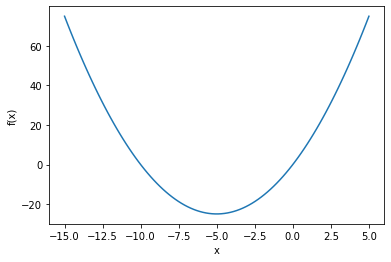

In [6]:
def f(x):
    return x**2 + 10*x

def f_deriv(x):
    return 2*x + 10

x = np.linspace(-15,5,100)
y = f(x)

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(x, y);


In this case the function has a single global minimum.  Often, we are not so lucky.
Consider for example the function

$$
g(x) = x^4 + 7x^3 + 5x^2 - 17x
$$

As the following plot shows, this function has multiple minima.   

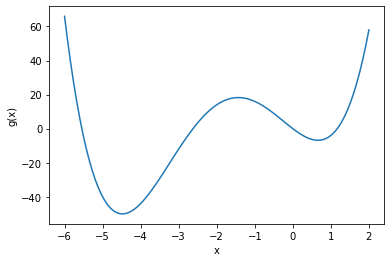

In [7]:
def g(x):
    return x**4 + 7*x**3 + 5*x**2 -17*x

def g_deriv(x):
    return 4*x**3 + 21*x**2 + 10*x - 17

x = np.linspace(-6, 2, 100)

plt.xlabel('x')
plt.ylabel('g(x)')

plt.plot(x, g(x));

Also, in this case solving for the minimum is not so easy, so we will consider an alternative method for this problem.

### Using derivatives to iteratively reach the minimum

For a function of a single variable, the derivative points us to the direction at which we would find a local minimum.  Well, actually it points at the opposite direction, so we would need to consider the negative of the derivative.
The idea is to take small steps in the direction of the negative of the derivative, which should converge to a local minimum.  
This insight translates to the following algorithm:

* Initialize $x(0),\eta$
* for $t = 0,1,\ldots$
  * $x(t+1) = x(t) - \eta \frac{d\!f}{dx}(x(t))$
  * if converged, break
  
Let's illustrate this with the function $g$ we defined above:

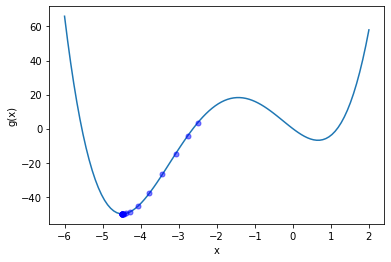

In [10]:
def g(x):
    return x**4 + 7*x**3 + 5*x**2 -17*x

def g_deriv(x):
    return 4*x**3 + 21*x**2 + 10*x - 17

eta = 0.01
x0 = -2.5 # the initial value
x_list = [x0]
y_list = [g(x0)]
for t in range(1, 20):
    x_new = x_list[-1] -eta * g_deriv(x_list[-1])
    x_list.append(x_new)
    y_list.append(g(x_new))
        
x_grid = np.linspace(-6, 2, 100)

plt.xlabel('x')
plt.ylabel('g(x)')

plt.plot(x_grid, g(x_grid));
plt.plot(x_list, y_list, 'ob', markersize=5, alpha=0.5);

In the example above, with the starting point chosen, we were able to find the global minimum of this function.  However, with a different choice, we might only find a **local minimum**:


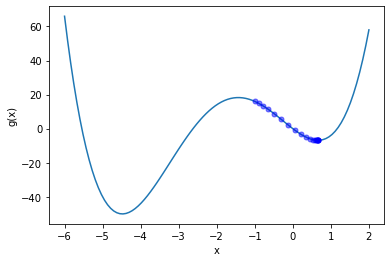

In [9]:
eta = 0.01
x0 = -1 # the initial value
x_list = [x0]
y_list = [g(x0)]
for t in range(1, 20):
    x_new = x_list[-1] -eta * g_deriv(x_list[-1])
    x_list.append(x_new)
    y_list.append(g(x_new))
        
x_grid = np.linspace(-6, 2, 100)

plt.xlabel('x')
plt.ylabel('g(x)')

plt.plot(x_grid, g(x_grid));
plt.plot(x_list, y_list, 'ob', markersize=5, alpha=0.5);

### Partial derivatives

Until now, we considered derivatives of functions of a single variable.
Next, we are going to consider functions of multiple variables, e.g.:

$$f(x_1,x_2) = x_1^2 + x_2^2$$

We can take a derivative with respect to either $x_1$ or $x_2$. 
A derivative with respect to a variable while holding the others constant is called the **partial derivative**.  The partial derivative with respect to $x_1$ is denoted as

$$\frac{\partial f(x_1,x_2)}{\partial x_1} = \frac{\partial (x_1^2 + x_2^2)}{\partial x_1}$$

$f(x_1,x_2)$ is the sum of two terms.  The first is a polynomial in $x_1$ for which we use the power rule, while the second is constant when considered a function of $x_1$.  Therefore we have that:

$$\frac{\partial (x_1^2 + x_2^2)}{\partial x_1} = 2x_1$$

Overall we have two partial derivatives for this function:

$$\frac{\partial f(x_1,x_2)}{\partial x_1} = 2x_1 \\
\frac{\partial f(x_1,x_2)}{\partial x_2} = 2x_2$$

Setting the partial derivatives to 0 and solving for $x_1,x_2$ tells us that $(0,0)$ is an extremum point for $f$.  (An extremum point is a maximum, minimum or saddle point).
The condition for determining that an extremum point is indeed a minimum/maximum for multi-variate functions is more complex than for univariate functions, and will not be discussed in this course.

### Exercises

Compute the gradients of the following functions:

$$f(x_1,x_2) = 4x_1^2 x_2 + x_2^3$$

$$g(x_1,x_2) = - x_1 e^{-2(x_1 + x_2)}$$

$$
h(x_1, x_2) = \frac{1}{1 + e^{-(w_1 x_1 + w_2 x_2)}}
$$


### Finding the solution to univariate linear regression

Objective:  find $(w,b)$ that minimize 
$$
J( w,b ) = \sum_{i=1}^N (y_i - \hat{y}_i)^2.
$$
For univariate linear regression this takes on the form:
$$
J( w,b ) = \sum_{i=1}^N (y_i - (w x_i + b))^2.
$$

To find the solution, we take the partial derivatives, set them to 0 and solve for $w$ and $b$.
Verify that 
$$
\frac{\partial J}{\partial w} = -2 \sum_{i=1}^n x_i(y_i - (w x_i + b))
$$
and
$$
\frac{\partial J}{\partial b} = -2 \sum_{i=1}^n (y_i - (w x_i + b))
$$
Setting to 0 gives us two equations in two unknowns that can be solved for.
Ultimately, we are interested in the multi-variate version, so we will not seek the solution.
